Manifold Learning Notes:
Non-linear Dimensionality Reduction.
Manifold - zoom into any point, if keep zooming in it looks like lower dimension euclidean set.
Data set is 3d originally - but aroung point will look like 2D sheet.

Isomap - points(Nodes), roads(edges)
2 closest neighbors and add these edges to connect them
only allowed to travel on the roads. Makes points that would be close now very far

multi-dimensional scaling: turns distances into a 1 dimenional representation for the points
ex:
2 nearest neighbor map

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
np.set_printoptions(precision=2, suppress=True)

In [3]:
##just for demo but you wouldnt have to actually do this
import numpy as np

point_names = ['A', 'B', 'C', 'D', 'E']
distances = np.array([[0, 5, 8, 13, 16],
                      [5, 0, 5, 10, 13],
                      [8, 5, 0, 5, 8],
                      [13, 10, 5, 0, 5],
                      [16, 13, 8, 5, 0]])

In [4]:

from sklearn.manifold import MDS
#create instance
#we are precomputing distance table, otherwise it will assume that what you are feeding it is feature vectors
#random seed for random seed - when you run it will give different output. if random seed to the output will be the same
# remove random_state=0 and re-running gives you different 1D representations of A, B, C, D, E
mds = MDS(n_components=1, dissimilarity='precomputed', random_state=0)

In [5]:
low_dimensional_points = mds.fit_transform(distances)
print(low_dimensional_points)

[[ 6.4]
 [ 6.6]
 [ 0. ]
 [-4.6]
 [-8.4]]


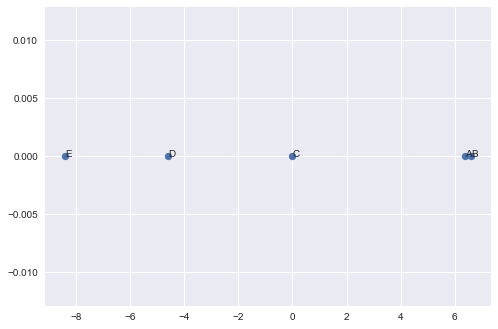

In [6]:
plt.scatter(low_dimensional_points, np.zeros(len(low_dimensional_points)))
for idx in range(len(point_names)):
    plt.annotate(point_names[idx], (low_dimensional_points[idx], 0))

In [7]:
swiss_roll_2d = np.array([[479, -231],
                          [515, -237],
                          [551, -233],
                          [581, -255],
                          [597, -284],
                          [610, -313],
                          [619, -341],
                          [623, -368],
                          [617, -407],
                          [591, -434],
                          [573, -468],
                          [542, -478],
                          [507, -490],
                          [471, -482],
                          [437, -462],
                          [398, -446],
                          [383, -408],
                          [403, -373],
                          [430, -349],
                          [470, -326],
                          [507, -320],
                          [531, -352],
                          [527, -385],
                          [487, -397]])

In [8]:
print(swiss_roll_2d.shape)

(24, 2)


(370.99137544802863,
 635.0086245519716,
 -502.96287711552617,
 -218.0371228844739)

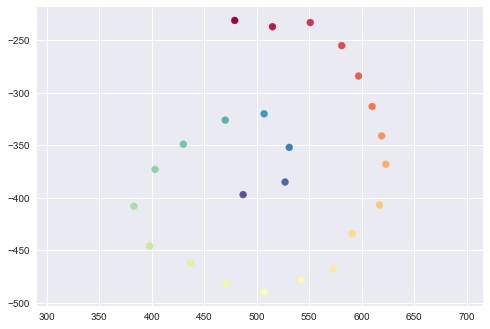

In [9]:
plt.scatter(swiss_roll_2d[:, 0], swiss_roll_2d[:, 1], c = list(range(len(swiss_roll_2d))),cmap='Spectral')
plt.axis('equal')

In [10]:
#list(range(len(swiss_roll_2d)))

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
swiss_roll_1d_pca = pca.fit_transform(swiss_roll_2d)

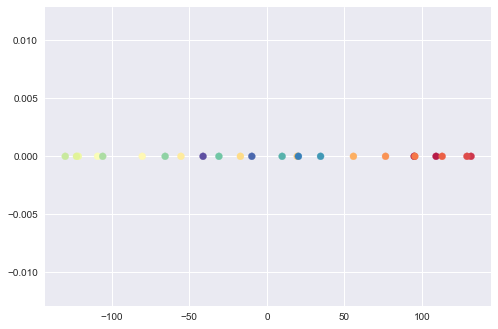

In [12]:
##this does not go from red to purple bc PCA just smashes
def plot_1d(data_1d, y_offset=-0.001):
    plt.scatter(data_1d, np.zeros(len(data_1d)),
                c=list(range(len(data_1d))), cmap='Spectral')
    
plot_1d(swiss_roll_1d_pca)

In [13]:
from sklearn.manifold import Isomap
#n-compnents is number of dimension to bring this down to
isomap = Isomap(n_neighbors=2, n_components=1)
swiss_roll_1d_isomap = isomap.fit_transform(swiss_roll_2d)

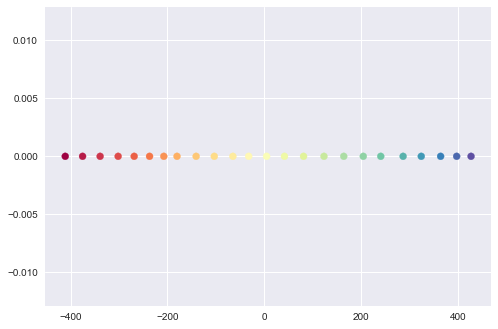

In [14]:
plot_1d(swiss_roll_1d_isomap)

In [15]:
#can list the distance matrix it computed
print(isomap.dist_matrix_)

[[  0.    36.5   72.03 109.23 142.35 174.13 203.54 230.84 270.3  307.78
  346.25 378.82 415.82 452.7  492.15 534.3  575.16 615.47 651.59 697.73
  735.22 775.22 808.46 838.15]
 [ 36.5    0.    36.22  73.42 106.54 138.33 167.74 195.03 234.49 271.97
  310.44 343.02 380.02 416.89 456.34 498.5  539.35 579.66 615.78 661.93
  699.41 739.41 772.65 802.35]
 [ 72.03  36.22   0.    37.2   70.32 102.1  131.51 158.81 198.27 235.75
  274.22 306.8  343.8  380.67 420.12 462.27 503.13 543.44 579.56 625.7
  663.19 703.19 736.43 766.12]
 [109.23  73.42  37.2    0.    33.12  64.9   94.31 121.61 161.07 198.55
  237.02 269.59 306.59 343.47 382.92 425.07 465.93 506.24 542.36 588.5
  625.99 665.99 699.23 728.92]
 [142.35 106.54  70.32  33.12   0.    31.78  61.19  88.49 127.94 165.43
  203.9  236.47 273.47 310.35 349.8  391.95 432.8  473.12 509.24 555.38
  592.86 632.86 666.11 695.8 ]
 [174.13 138.33 102.1   64.9   31.78   0.    29.41  56.71  96.16 133.65
  172.12 204.69 241.69 278.57 318.02 360.17 401.02 441.

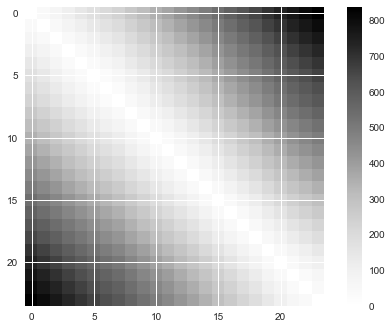

In [16]:

plt.imshow(isomap.dist_matrix_)
plt.colorbar()

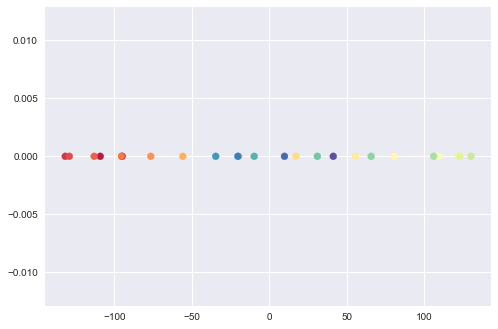

In [18]:
##bad Isomap ##connects everything

bad_isomap = Isomap(n_neighbors = 23,n_components = 1)

swiss_roll_1d_bad_isomap = bad_isomap.fit_transform(swiss_roll_2d)

plot_1d(swiss_roll_1d_bad_isomap)

<function matplotlib.pyplot.colorbar>

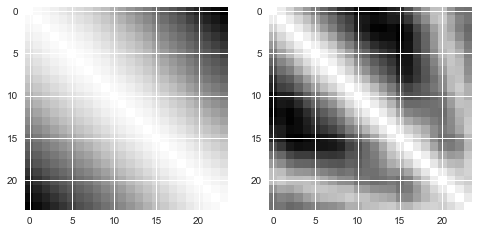

In [19]:
plt.subplot(1,2,1)
plt.imshow(isomap.dist_matrix_)
plt.colorbar

plt.subplot(1,2,2)
plt.imshow(bad_isomap.dist_matrix_)
plt.colorbar

# T-SNE Example - 2nd Manifold Method


Approximation error in computing the distance and lose information when going to lower dimension

Isomap depends on how you construct nearest neighbor graph

Do you cacre more about local structure or global structure

In [ ]:
## no determinostic definition of neighbors
## probability distribution of whether points are similar

